In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf 
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation , Resizing , Rescaling,RandomRotation,RandomFlip
from tensorflow.data import AUTOTUNE

from PIL import Image

In [17]:
healthy_img = 'mri_data\\Brain Tumor MRI images\\Healthy\\mri_healthy (1).jpeg'
tumor_img = 'mri_data\\Brain Tumor MRI images\\Tumor\\glioma (14).jpg'

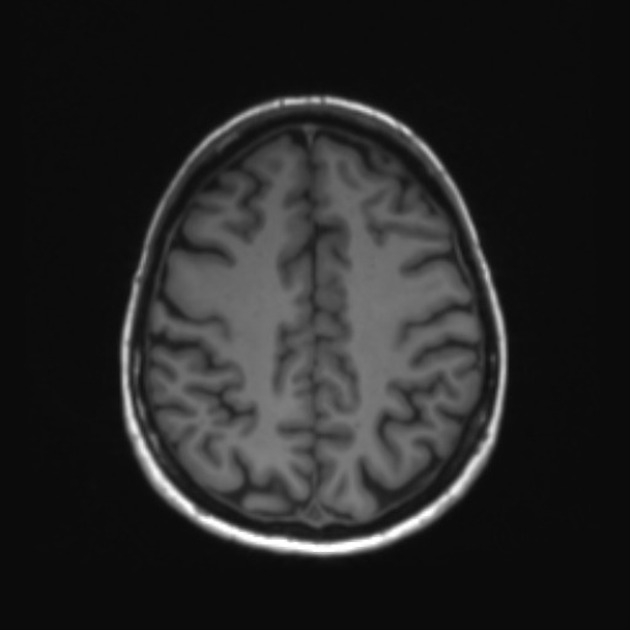

In [18]:
## healthy Image
h_img = Image.open(healthy_img)
h_img


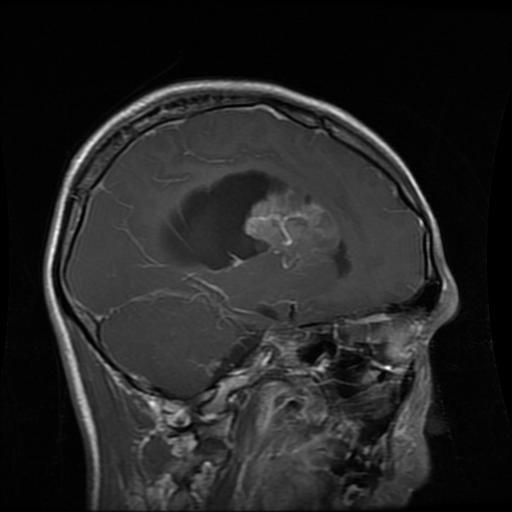

In [19]:
## Tumor Image
t_img = Image.open(tumor_img)
t_img


In [20]:
## Now lets check the 
h_dir = 'mri_data/Brain Tumor MRI images/Healthy'
t_dir = 'mri_data/Brain Tumor MRI images/Tumor'

for i, (h_img_name, t_img_name) in enumerate(zip(os.listdir(h_dir), os.listdir(t_dir))):
    if i < 10:
        h_img = Image.open(os.path.join(h_dir, h_img_name))
        t_img = Image.open(os.path.join(t_dir, t_img_name))
        print(f'Healthy image size: {h_img.size}   Tumor image size: {t_img.size}')


Healthy image size: (630, 630)   Tumor image size: (512, 512)
Healthy image size: (640, 640)   Tumor image size: (512, 512)
Healthy image size: (630, 630)   Tumor image size: (512, 512)
Healthy image size: (236, 251)   Tumor image size: (512, 512)
Healthy image size: (256, 256)   Tumor image size: (512, 512)
Healthy image size: (224, 224)   Tumor image size: (512, 512)
Healthy image size: (256, 256)   Tumor image size: (512, 512)
Healthy image size: (224, 224)   Tumor image size: (512, 512)
Healthy image size: (256, 256)   Tumor image size: (512, 512)
Healthy image size: (256, 256)   Tumor image size: (512, 512)


In [21]:
Brain_Tumor_MRI_images_folder = 'mri_data/Brain Tumor MRI images'
Brain_Tumor_CT_scan_Images_folder = 'mri_data/Brain Tumor CT scan Images'

In [22]:
im_size = 128
batch_size = 32

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  Brain_Tumor_MRI_images_folder,
  validation_split=0.2,
  subset="training",
  seed=88,
  #image_size=(im_size, im_size),
  batch_size=batch_size)



val_ds = tf.keras.utils.image_dataset_from_directory(
  Brain_Tumor_MRI_images_folder,
  validation_split=0.2,
  subset="validation",
  seed=88,
  #image_size=(im_size, im_size),
  batch_size=batch_size)

Found 5000 files belonging to 2 classes.
Using 4000 files for training.
Found 5000 files belonging to 2 classes.
Using 1000 files for validation.


In [24]:
## How to che check the classes name of  training set and validation set
class_names = train_ds.class_names
print(train_ds.class_names)
print(val_ds.class_names)

['Healthy', 'Tumor']
['Healthy', 'Tumor']


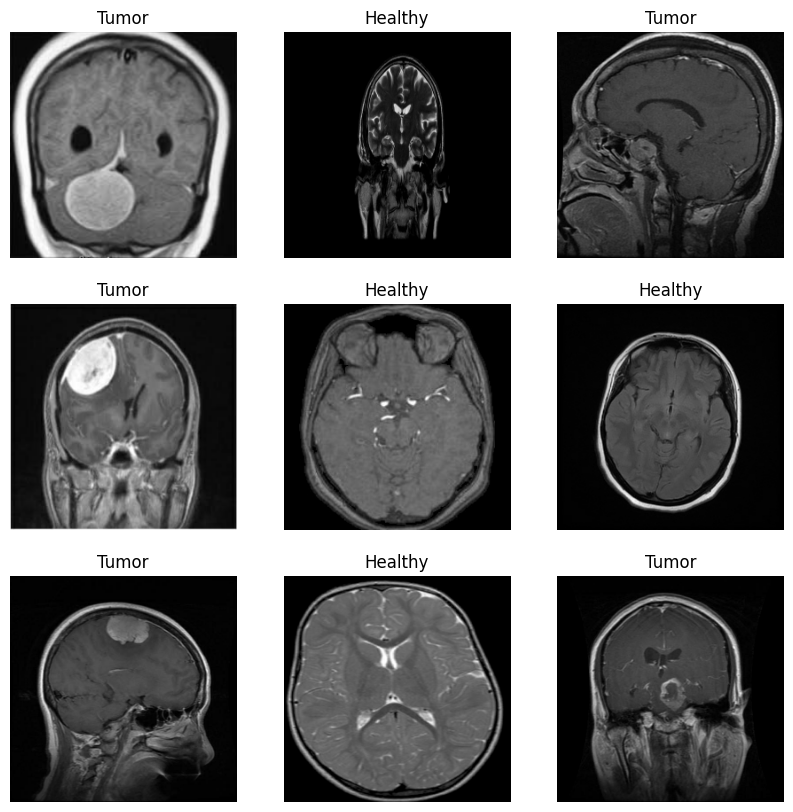

In [25]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [26]:
## Data Augumantation 

data_augmentation  = Sequential(
    [
        RandomRotation(factor=(-0.2,0.2)) , 
        RandomFlip(mode='horizantal_and_vertical')
    ]
)


In [27]:

resize_and_rescale = Sequential(
    [
        Resizing(im_size,im_size) , 
        Rescaling(1./255)
    ]
)


In [28]:
# Example on one batch from dataset
for images, labels in train_ds.take(1):
    augmented_images = data_augmentation(images)
    processed_images = resize_and_rescale(augmented_images)
    print("Original:", images.shape)
    print("After augmentation + resize/rescale:", processed_images.shape)


Original: (32, 256, 256, 3)
After augmentation + resize/rescale: (32, 128, 128, 3)


In [29]:
### Deep learning Model CNN

mri_model = Sequential([
    # ----Input Block and data augmentation and rescale 
    InputLayer(input_shape=(None, None, 3)),
    data_augmentation ,
    resize_and_rescale,

    

    # ----- Block 1 -----
    Conv2D(filters=10, kernel_size=5, strides=1, padding='valid'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=2, strides=2),

    # ----- Block 2 -----
    Conv2D(filters=6, kernel_size=5, strides=1, padding='valid'),
    BatchNormalization(),
    Activation('relu'),
    MaxPool2D(pool_size=2, strides=2),

    # ----- Classifier Head -----
    Flatten(),
    Dense(100),
    BatchNormalization(),
    Activation('relu'),

    Dense(10),
    BatchNormalization(),
    Activation('relu'),

    # Output layer for binary classification
    Dense(1, activation='sigmoid') # Corrected from 'sigmiod
])

mri_model.summary()

d:\ML_DL_Project\Computer Vision\p5\mri_venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 124, 124, 10)   │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 124, 124, 10)   │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 124, 124, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 6)      │         1,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 58, 58, 6)      │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 58, 58, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5046)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       504,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 508,491 (1.94 MB)

 Trainable params: 508,239 (1.94 MB)

 Non-trainable params: 252 (1008.00 B)

In [30]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
mri_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
history = mri_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 209ms/step - accuracy: 0.8345 - loss: 0.4091 - val_accuracy: 0.6640 - val_loss: 0.6017
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.8885 - loss: 0.2949 - val_accuracy: 0.6890 - val_loss: 0.5945
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.9087 - loss: 0.2430 - val_accuracy: 0.8180 - val_loss: 0.4303
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 150ms/step - accuracy: 0.9252 - loss: 0.2127 - val_accuracy: 0.9060 - val_loss: 0.2607
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.9335 - loss: 0.1830 - val_accuracy: 0.8880 - val_loss: 0.2688
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.9410 - loss: 0.1661 - val_accuracy: 0.9240 - val_loss: 0.1980
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 21s 166ms/step - accuracy: 0.9477 - loss: 0.1425 - val_accuracy: 0.9360 - val_loss: 0.1523
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.9510 - loss: 0

In [33]:
mri_model.evaluate(val_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9300 - loss: 0.1913


[0.19131174683570862, 0.9300000071525574]

In [34]:
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss    = history.history['loss']
val_loss= history.history['val_loss']

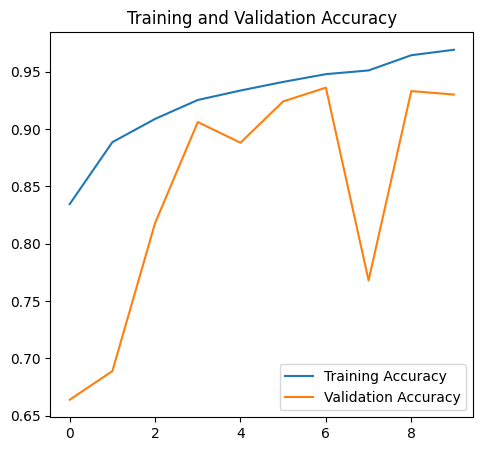

In [35]:
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


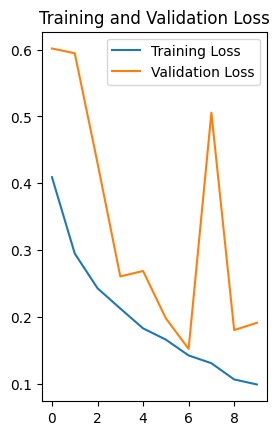

In [36]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
## predicting model
for images , labels in val_ds.take(1):
    #print(images[i],labels[i])
    break

In [ ]:
h_img = Image.open(healthy_img)
h_array = np.array(h_img)
h_array.shape
single_image = tf.expand_dims(h_img, axis=-1)
prediction = mri_model.predict(single_image)
float(prediction[0][0])

(630, 630)

In [39]:
int(prediction[0][0] > 0.5)

predicted_class = class_names[int(prediction[0][0] > 0.5)]
print("Raw prediction:", prediction)
print("Predicted label:", predicted_class)


Raw prediction: [[0.99642855]]
Predicted label: Tumor


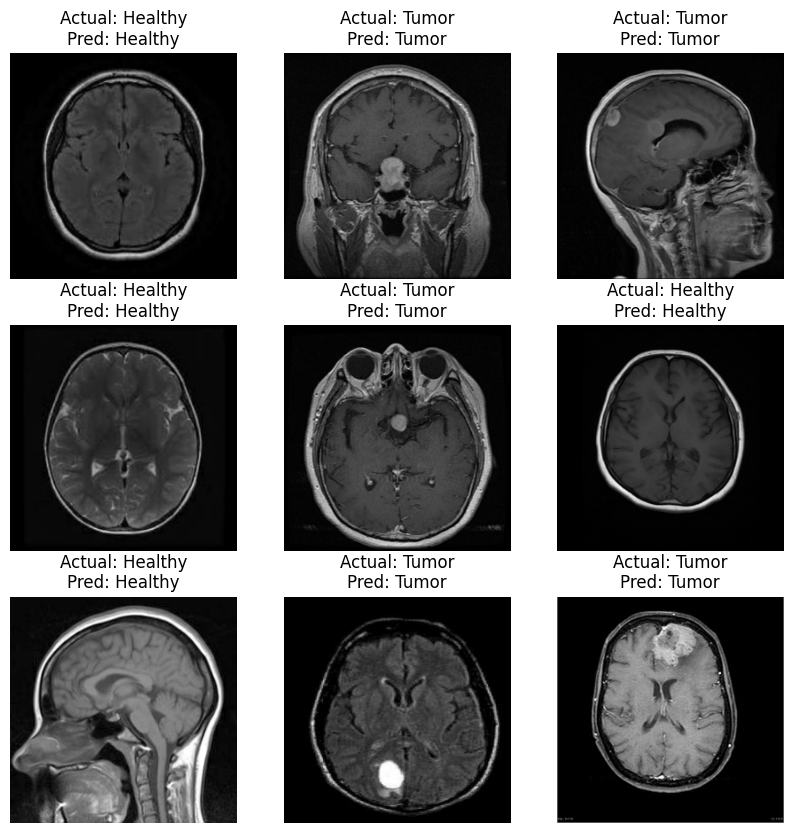

In [40]:
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

         
        single_image = tf.expand_dims(images[i], axis=0) 

        
        # prediction name for labels
        prediction = mri_model.predict(single_image, verbose=0)

        predicted_class = class_names[int(prediction[0][0] > 0.5)]

        # Actual class from labels
        actual_class = class_names[int(labels[i].numpy())]

        # Show the image
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual: {actual_class}\nPred: {predicted_class}")
        plt.axis("off")

plt.show()


In [41]:
prediction = mri_model.predict(images, verbose=0)
(prediction > 0.5).shape
pred = prediction.reshape(32,)
labels.numpy().shape

(32,)

In [42]:
## from 1 batch got 2 are Umatched from Actual to prediction
(np.array([1 if i < 0.5 else 0 for i in pred]) == labels.numpy()).sum()

np.int64(1)

In [93]:
class_names

['Healthy', 'Tumor']

In [102]:
def mri_brain(img):
    h_img = Image.open(img).convert('RGB')
    #h_img = h_img.resize((128, 128)) 
    #h_array = np.array(h_img).astype(np.float32) / 255.0  
    h_array = np.array(h_img)
    h_array = np.expand_dims(h_array,axis=0)
    prediction = mri_model.predict(h_array,verbose=False)
    predicted_class = class_names[int(prediction[0][0] > 0.5)]
    return predicted_class

In [103]:
mri_brain(tumor_img)

'Tumor'

## Gradio UI

In [104]:
import gradio as gr

In [105]:
theme = gr.themes.Glass(
    primary_hue='blue' , secondary_hue='teal'
).set(
    body_background_fill_dark="#022239"
)

In [114]:
with gr.Blocks(theme=theme) as demo:
    gr.Markdown('## Brain Tumor Classification')
    
    inp = gr.Image(type='filepath',label='Upload the Image',height=390,width=390)
    
    btn = gr.Button('predict')

    out = gr.Textbox(label='Prediction')
    
    btn.click(mri_brain , inputs=[inp],outputs=out)

In [115]:
demo.launch()

* Running on local URL:  http://127.0.0.1:7871
* To create a public link, set `share=True` in `launch()`.
